In [2]:
"""
Mount the remote disk to work with data.

(Note this is for given MSA 14460)

sudo sshfs -o allow_other,defer_permissions \
USER@matlaber1.media.mit.edu:/REMOTE_DATA_PATH \
/LOCAL_DATA_PATH/

later...
sudo umount /LOCAL_DATA_PATH/

"""
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import pandas as pd


data_path = "../data/mount/201902/"

In [3]:
# Read in the data of interest.

# How is this different than the other files?
filename_14460_201902 = "14460_201902.csv"
filepath = data_path + filename_14460_201902
df_14460_201902 = pd.read_csv(filepath)
print(df_14460_201902.shape)

(8348279, 7)


In [9]:
DEVICE_ID = 'device ID'
# update the columns to use 'device ID instead of LBS provider name'
df_14460_201902.rename(columns={df_14460_201902.columns[2]:DEVICE_ID}, inplace=True)

unique_device_ids = df_14460_201902[DEVICE_ID].nunique()
print('unique device ids:', unique_device_ids)

unique device ids: 273750


In [10]:
# Histogram of dwell times
dwell_times = df_14460_201902.DwellTime
dwell_times.describe()

count    8.348279e+06
mean     3.018497e+02
std      1.029048e+03
min      2.000000e+00
25%      1.022000e+01
50%      5.265000e+01
75%      2.667700e+02
max      4.335632e+04
Name: DwellTime, dtype: float64

In [11]:
# There are many longer dwell times
# 64596 are more than 1hr (3600)
long_dwell_times = dwell_times[dwell_times > 3600]
print('number of long dwell times (>1 hr):', long_dwell_times.shape[0])

number of long dwell times (>1 hr): 64596


In [12]:
# Histogram of occurances of each device id
device_occurances = df_14460_201902[DEVICE_ID].value_counts(ascending=True)
device_occurances.describe()

count    273750.000000
mean         30.495996
std          43.804200
min           1.000000
25%           3.000000
50%          12.000000
75%          41.000000
max         832.000000
Name: device ID, dtype: float64

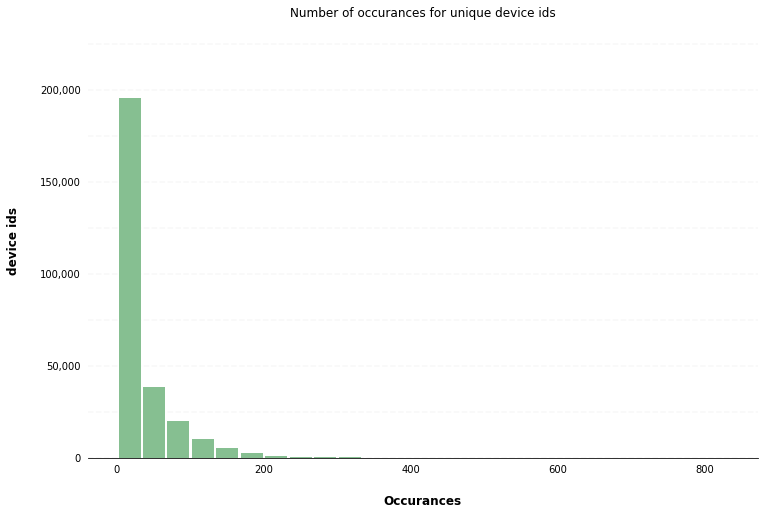

In [14]:
ax = device_occurances.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
x=ax
# Despine
x.spines['right'].set_visible(False)
x.spines['top'].set_visible(False)
x.spines['left'].set_visible(False)

# Switch off ticks
x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = x.get_yticks()
for tick in vals:
    x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Remove title
x.set_title("Number of occurances for unique device ids")

# Set x-axis label
x.set_xlabel("Occurances", labelpad=20, weight='bold', size=12)

# Set y-axis label
x.set_ylabel("device ids", labelpad=20, weight='bold', size=12)

# Format y-axis label
x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [15]:
device_occurances.describe()

count    273750.000000
mean         30.495996
std          43.804200
min           1.000000
25%           3.000000
50%          12.000000
75%          41.000000
max         832.000000
Name: device ID, dtype: float64